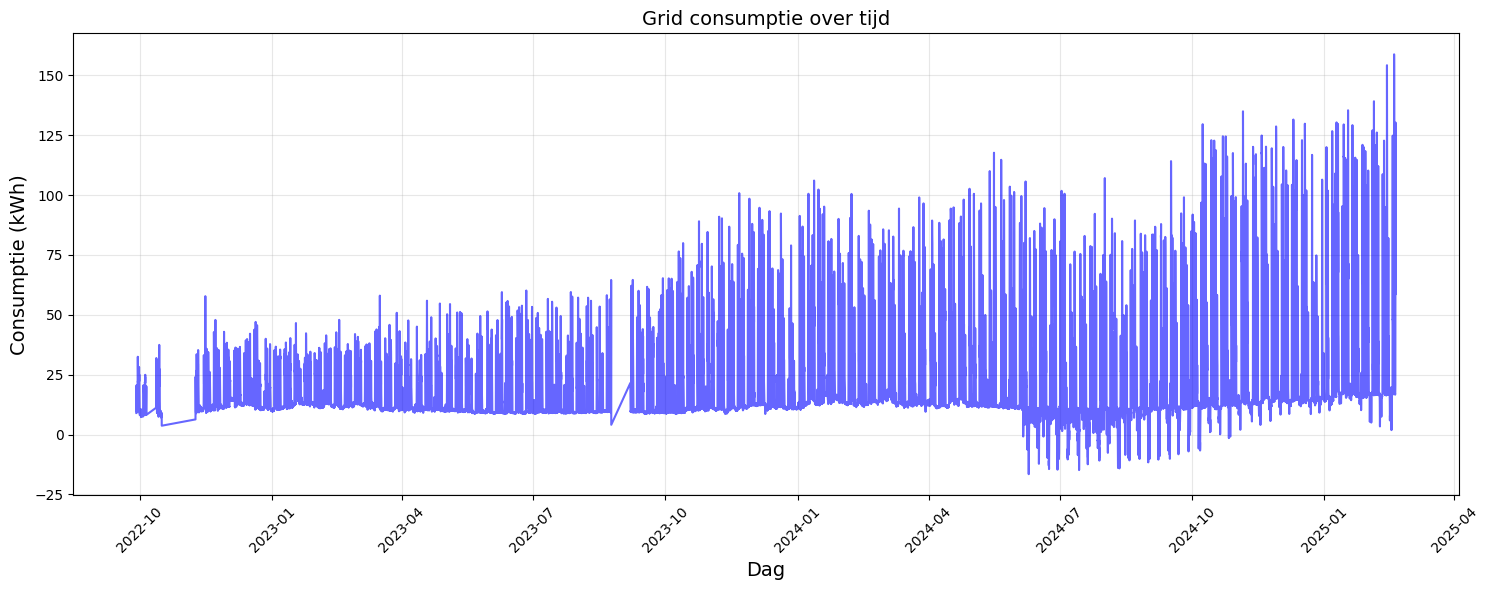

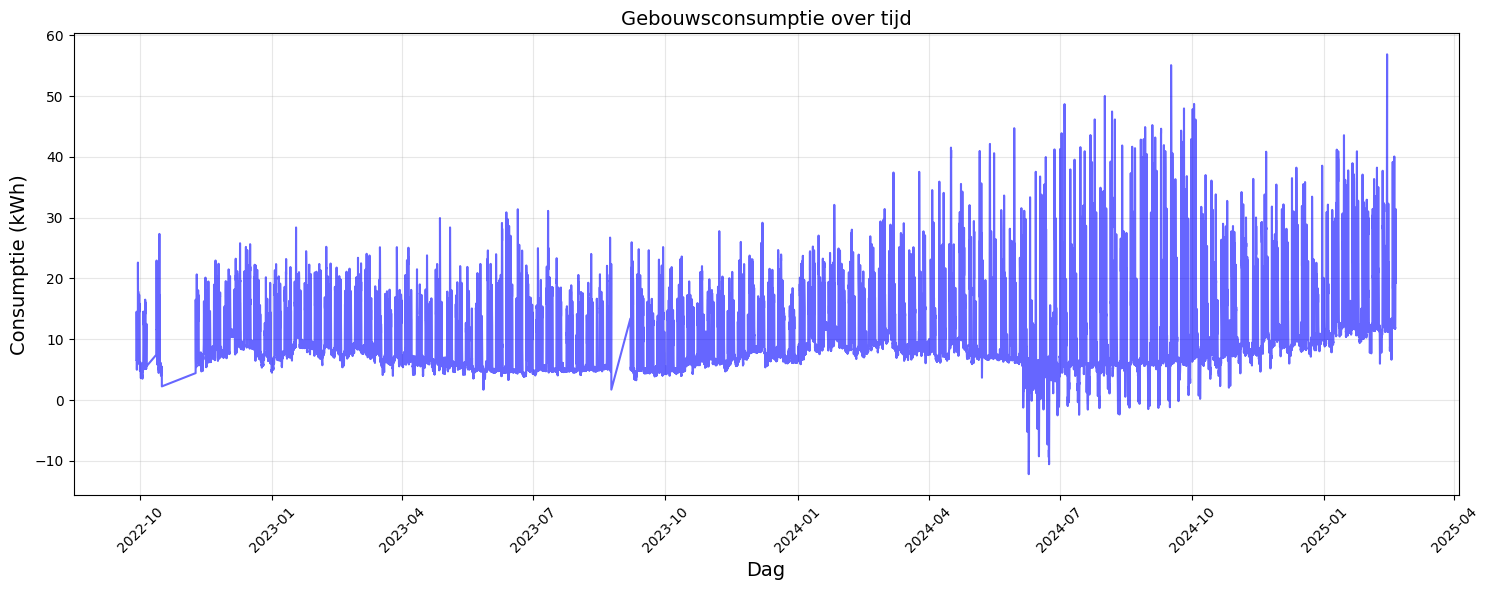

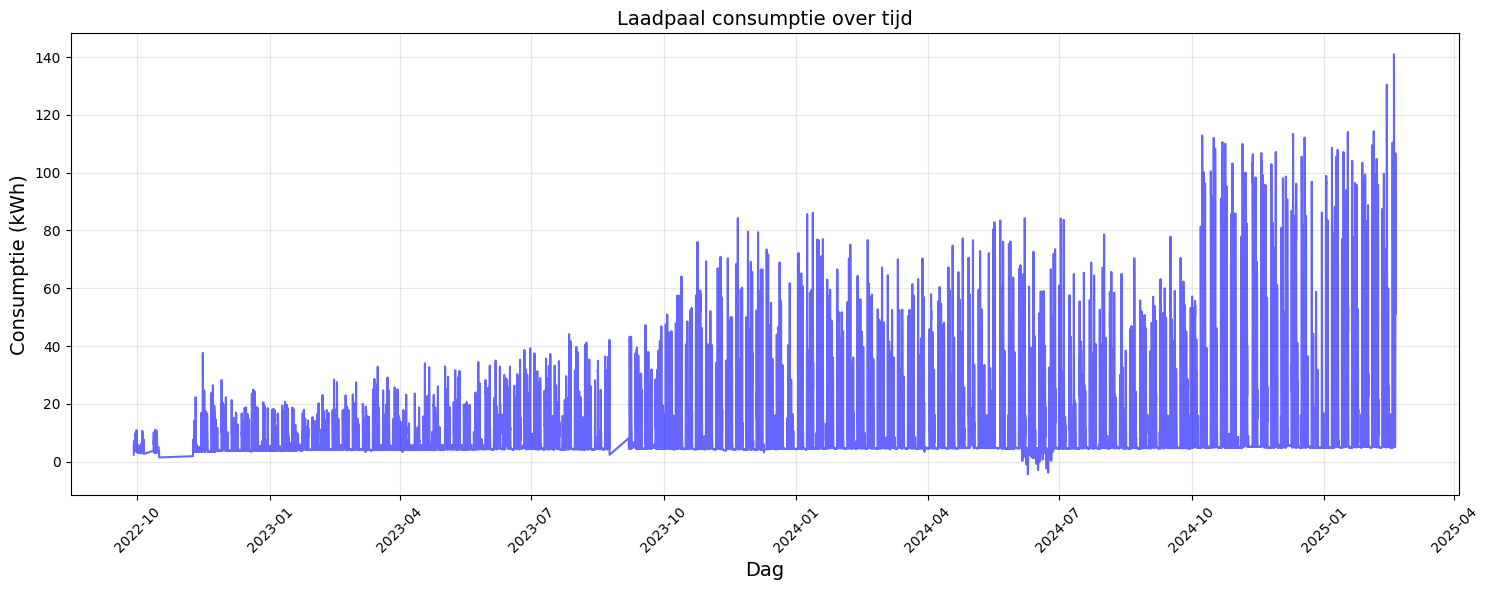

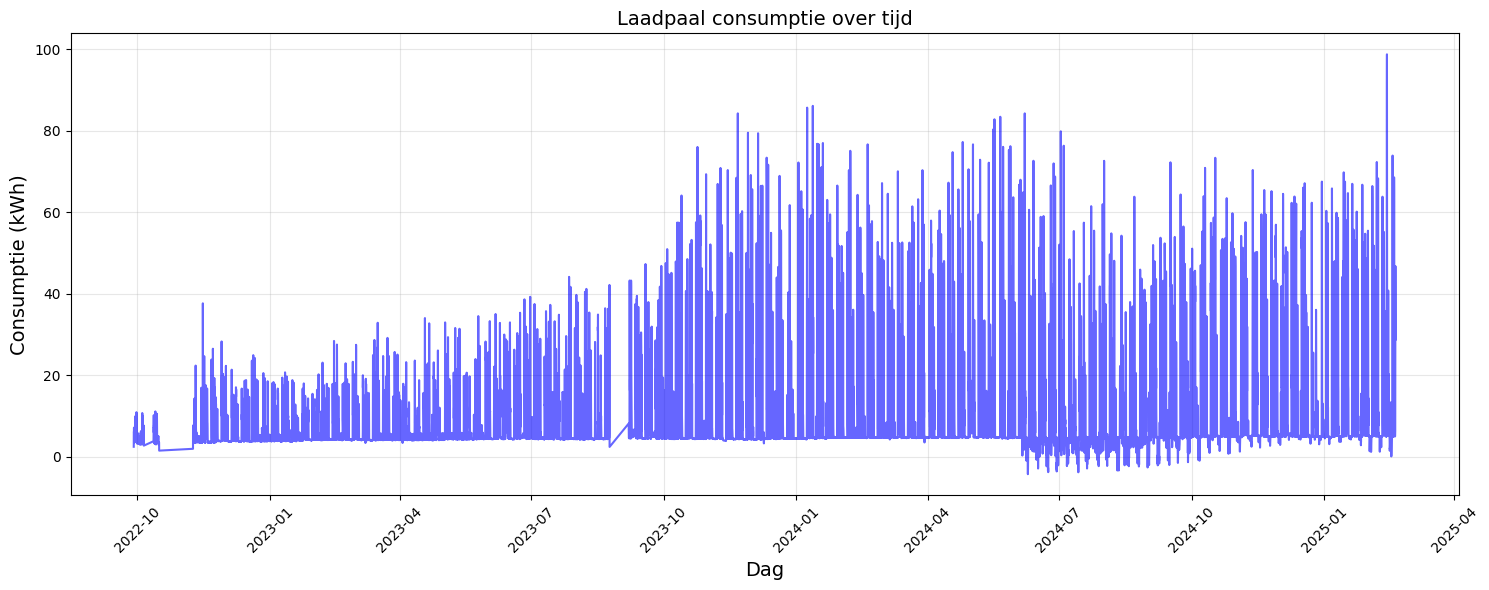

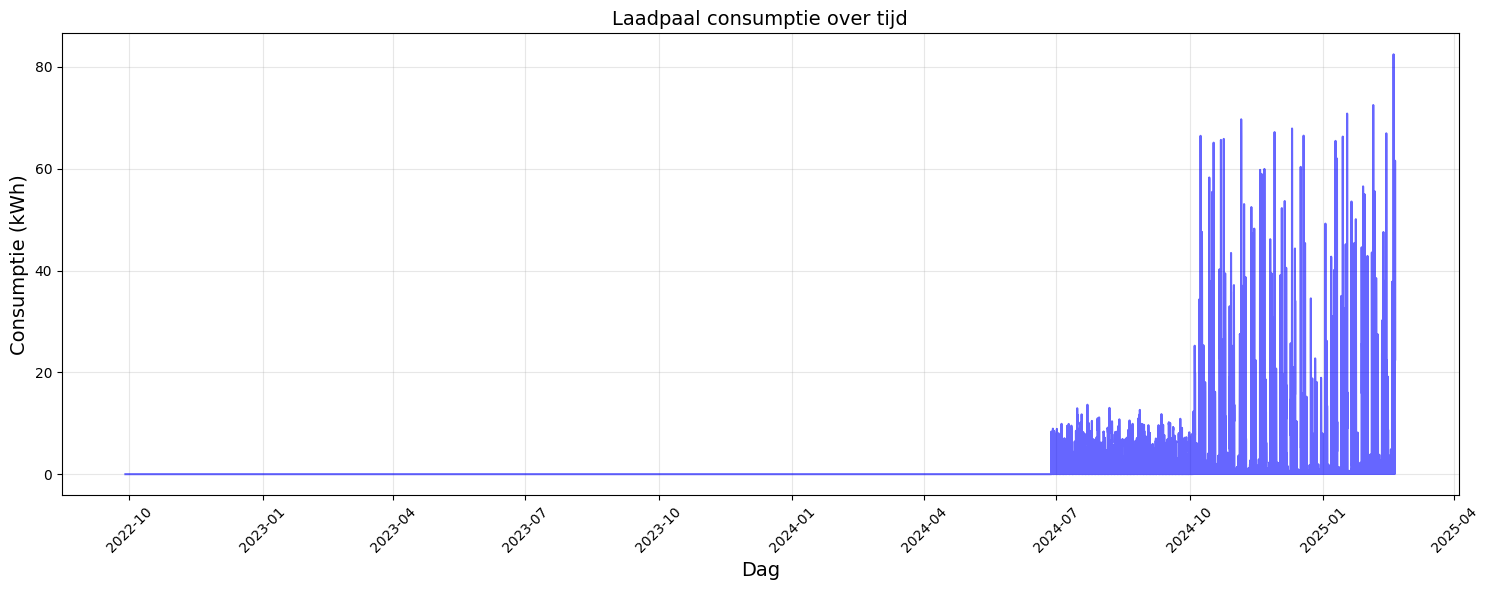

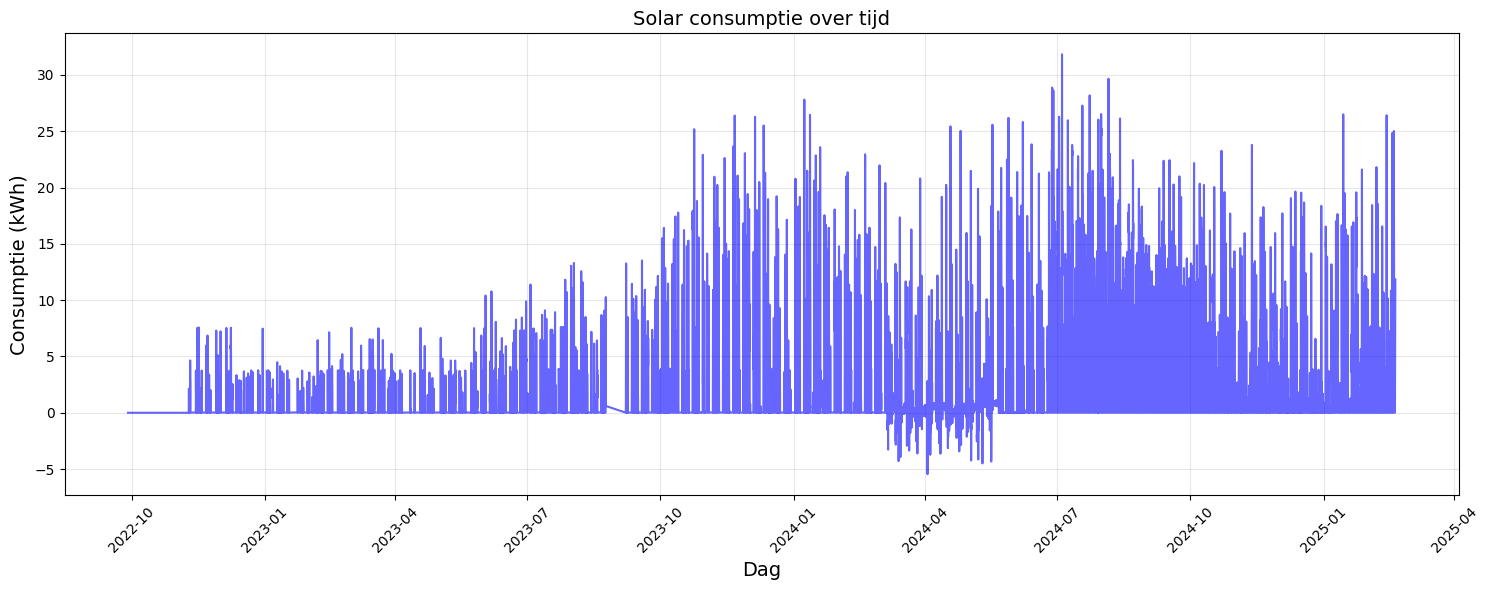

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import calendar


# Optional: set matplotlib inline if using a Jupyter Notebook
%matplotlib inline

import pandas as pd
import numpy as np

# Load the hourly data
df = pd.read_csv('../aggregated_hourly_measurements.csv')
df.set_index("Hour", inplace=True)
df.index = pd.to_datetime(df.index)

df["Chargers_total"] = df["Chargers"] + df["Chargers achteraan"]

df["building_total"] = df["Grid Organi lbc"] - df["Chargers_total"] + df['Solar'].where(df.index >= '2024-06-27', 0)

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Grid Organi lbc'], color='blue', alpha=0.6)
plt.title('Grid consumptie over tijd', fontsize=14)
plt.xlabel('Dag', fontsize=14)
plt.ylabel('Consumptie (kWh)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['building_total'], color='blue', alpha=0.6)
plt.title('Gebouwsconsumptie over tijd', fontsize=14)
plt.xlabel('Dag', fontsize=14)
plt.ylabel('Consumptie (kWh)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Chargers_total'], color='blue', alpha=0.6)
plt.title('Laadpaal consumptie over tijd', fontsize=14)
plt.xlabel('Dag', fontsize=14)
plt.ylabel('Consumptie (kWh)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Chargers'], color='blue', alpha=0.6)
plt.title('Laadpaal consumptie over tijd', fontsize=14)
plt.xlabel('Dag', fontsize=14)
plt.ylabel('Consumptie (kWh)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Chargers achteraan'], color='blue', alpha=0.6)
plt.title('Laadpaal consumptie over tijd', fontsize=14)
plt.xlabel('Dag', fontsize=14)
plt.ylabel('Consumptie (kWh)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Solar'], color='blue', alpha=0.6)
plt.title('Solar consumptie over tijd', fontsize=14)
plt.xlabel('Dag', fontsize=14)
plt.ylabel('Consumptie (kWh)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

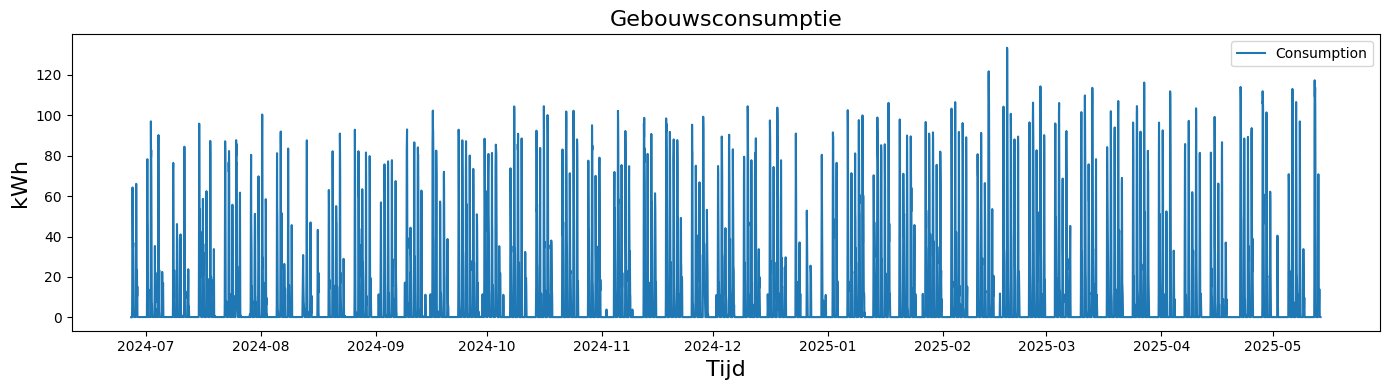

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------- I/O paths --------------------
input_file  = "../hourly_year_13-05.csv"


# -------------------- Load & initial filter --------------------
df = pd.read_csv(input_file, sep=",", decimal=",", quotechar='"')
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date and remove data before June 27, 2024
df.sort_values("Date", inplace=True)
df = df[df["Date"] >= pd.Timestamp("2024-06-27")]

# -------------------- Column groups -------------------
# Grid and Solar columns (explicit)
grid_cols = [
    "Grid Organi lbc (L1) [kWh]",
    "Grid Organi lbc (L2) [kWh]",
    "Grid Organi lbc (L3) [kWh]"
]
solar_cols = [
    "Solar (L1) [kWh]",
    "Solar (L2) [kWh]",
    "Solar (L3) [kWh]"
]
# Charger columns (explicit)
charger_other_cols = [
    "Chargers (L1) [kWh]",
    "Chargers (L2) [kWh]",
    "Chargers (L3) [kWh]"
]
charger_achteraan_cols = [
    "Chargers achteraan (L1) [kWh]",
    "Chargers achteraan (L2) [kWh]",
    "Chargers achteraan (L3) [kWh]"
]

# -------------------- Column totals ------------------
# Sum grid and solar
df["Grid"]  = df[grid_cols].sum(axis=1)
df["Solar"] = df[solar_cols].sum(axis=1)

# -------------------- Adjust rear-end chargers ------------------
end_cutoff = pd.Timestamp("2024-10-04")
# Copy Achteraan and apply 4× only before the cutoff
df_achteraan = df[charger_achteraan_cols]
df_achteraan_adj = df_achteraan.copy()
mask = df["Date"] < end_cutoff
df_achteraan_adj.loc[mask] = df_achteraan.loc[mask] * 6

# -------------------- Sum all chargers ------------------
df["Chargers"] = df[charger_other_cols].sum(axis=1) + df_achteraan_adj.sum(axis=1)

# -------------------- Compute consumption ------------------
df['Consumption'] = df['Grid'] - df['Chargers'] + df['Solar']



# -------------------- Plot --------------------------
# Use Date as index to plot time series
df.set_index("Date", inplace=True)
plt.figure(figsize=(14, 4))
plt.plot(df["Chargers"], label="Consumptie")
plt.title("Gebouwsconsumptie", fontsize=16)
plt.xlabel("Tijd", fontsize=16)
plt.ylabel("kWh", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19280\19459840.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


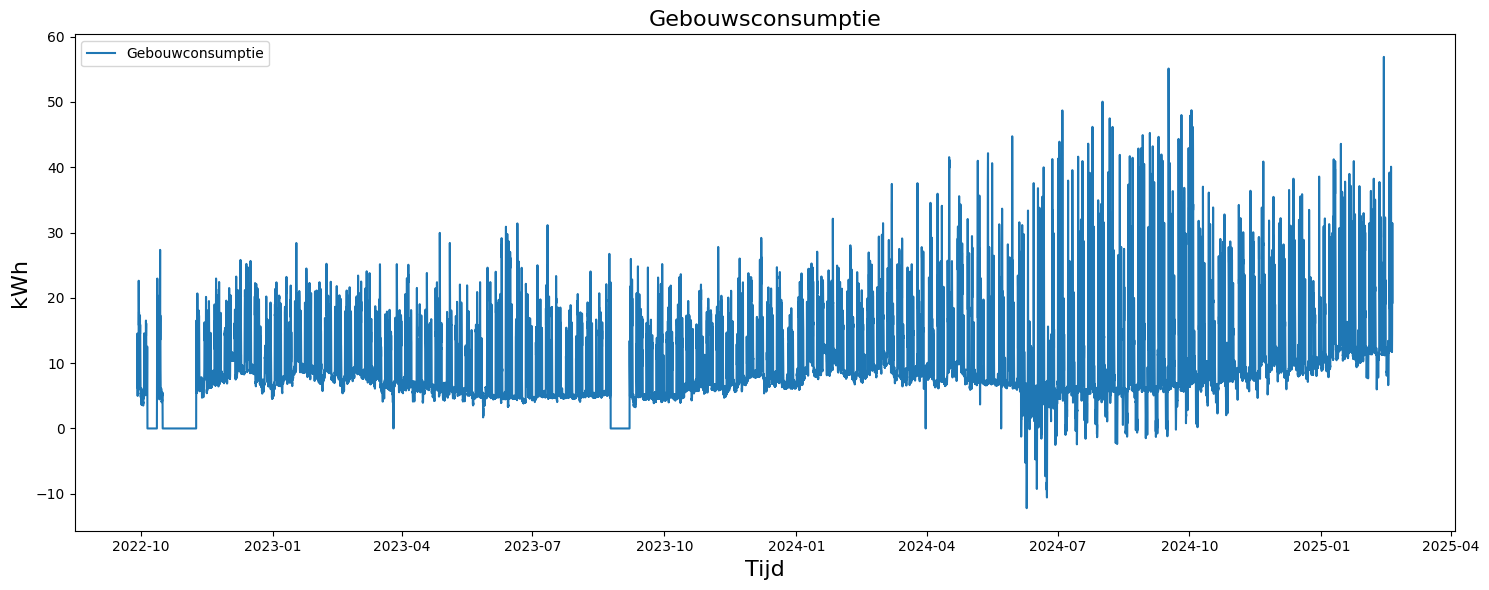

C:\Users\user\AppData\Local\Temp\ipykernel_19280\19459840.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  period2 = pd.date_range(start='2023-08-24', end='2023-09-06', freq='H')


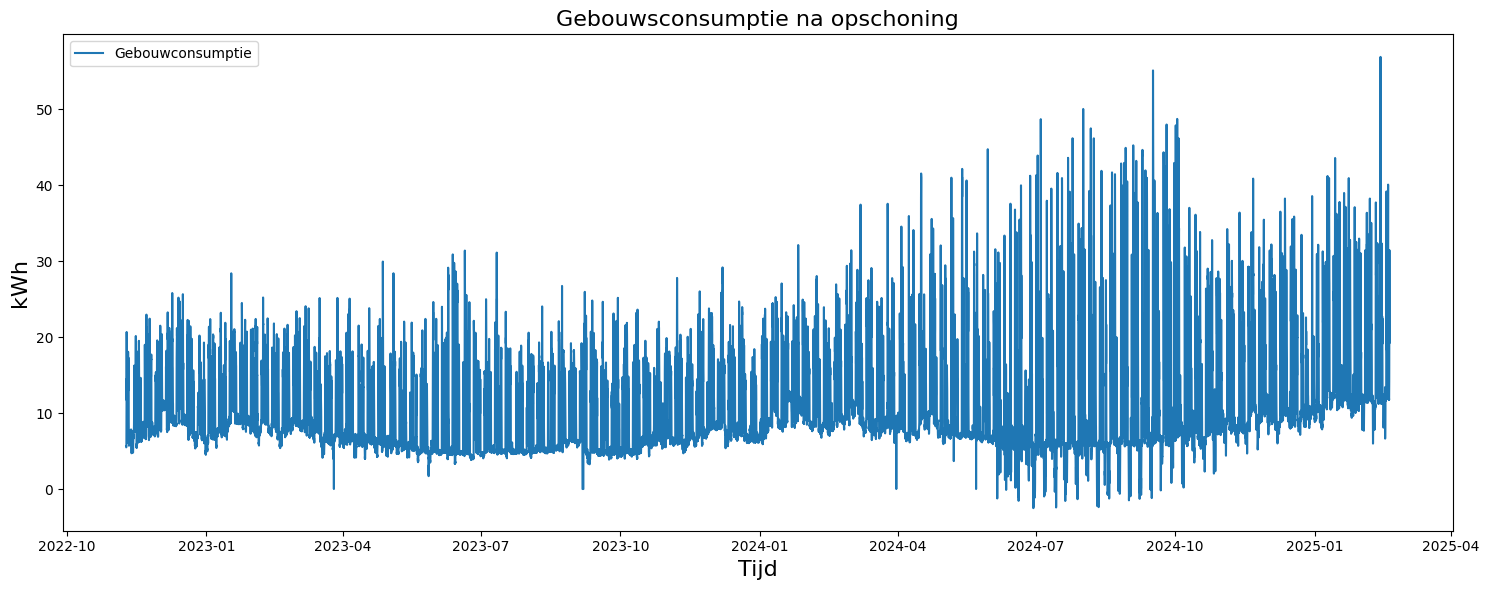

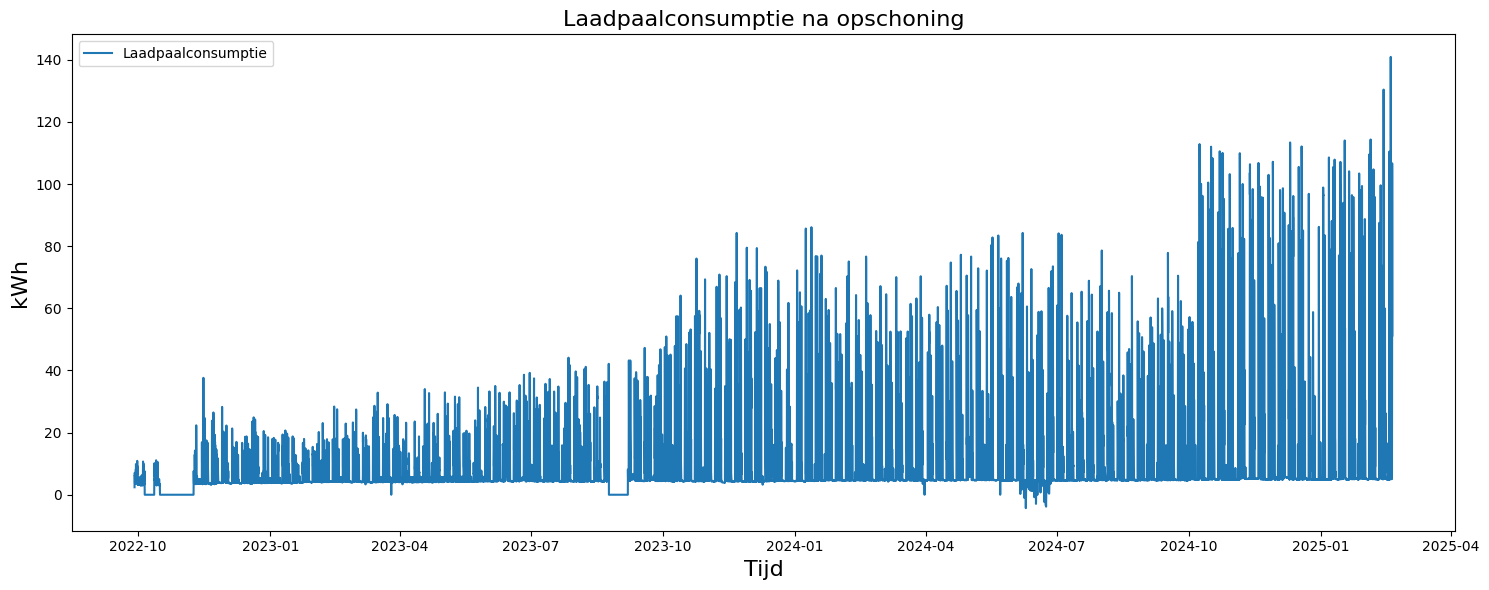

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load Data ---
input_file = '../aggregated_hourly_measurements.csv'
df = pd.read_csv(input_file, sep=',', decimal='.', quotechar='"')

# --- Format datetime ---
df['Hour'] = pd.to_datetime(df['Hour'])
df.set_index('Hour', inplace=True)

# --- Reindex to complete hourly timeline ---
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)



# --- Bereken Chargers ---
df['Chargers'] = (
    df['Grid Organi lbc'].fillna(0) +
    df['Solar'].where(df.index >= '2024-06-27', 0).fillna(0) -
    df['Chargers'].fillna(0) -
    df['Chargers achteraan'].fillna(0)
)


plt.figure(figsize=(15, 6))
plt.plot(df["Chargers"], label="Gebouwconsumptie")
plt.title("Gebouwsconsumptie", fontsize=16)
plt.xlabel("Tijd", fontsize=16)
plt.ylabel("kWh", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

# --- Voeg dag & uur toe voor interpolatie ---
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour

# --- Verwijder foutieve periode 1 ---
df.loc['2022-09-28':'2022-11-08', 'Chargers'] = np.nan

# --- Interpoleer periode 2 met gemiddelden uit 2023 ---
period2 = pd.date_range(start='2023-08-24', end='2023-09-06', freq='H')
df.loc[period2, 'Chargers'] = np.nan

df_2023 = df[(df.index.year == 2023) & (df['Chargers'].notna())]
hourly_avg = df_2023.groupby(['day_of_week', 'hour_of_day'])['Chargers'].mean()

for dt in period2:
    if pd.isna(df.loc[dt, 'Chargers']):
        d, h = dt.dayofweek, dt.hour
        if (d, h) in hourly_avg.index:
            df.loc[dt, 'Chargers'] = hourly_avg.loc[(d, h)]

# --- Corrigeer foutieve data in juni 2024 ---
wrong_dates = pd.to_datetime([
    '2024-06-08', '2024-06-09', '2024-06-15',
    '2024-06-16', '2024-06-22', '2024-06-23'
])
for d in wrong_dates:
    df.loc[df.index.normalize() == d.normalize(), 'Chargers'] = np.nan

df_2024 = df[(df.index.year == 2024) & (df['Chargers'].notna())]
avg_2024 = df_2024.groupby(['day_of_week', 'hour_of_day'])['Chargers'].mean()

for d in wrong_dates:
    for dt in df.loc[df.index.normalize() == d.normalize()].index:
        dow, hour = dt.dayofweek, dt.hour
        if (dow, hour) in avg_2024.index:
            df.loc[dt, 'Chargers'] = avg_2024.loc[(dow, hour)]

# --- Bereken totaal laadtijd ---
df['Chargers total'] = df['Chargers'].fillna(0) + df['Chargers achteraan'].fillna(0)

# --- Opruimen hulpkolommen ---
df.drop(columns=['day_of_week', 'hour_of_day'], inplace=True)

# --- Reset index voor export ---
df.reset_index(inplace=True)
df.rename(columns={'index': 'Hour'}, inplace=True)
df.sort_values(by='Hour', inplace=True)

# --- Resultaat opslaan of gebruiken ---
df_result = df[['Hour', 'Chargers total', 'Chargers']]
# df_result.to_csv('cleaned_consumption.csv', index=False)  # Optioneel

# --- Plot ---
df.set_index('Hour', inplace=True)
plt.figure(figsize=(15, 6))
plt.plot(df["Chargers"], label="Gebouwconsumptie")
plt.title("Gebouwsconsumptie na opschoning", fontsize=16)
plt.xlabel("Tijd", fontsize=16)
plt.ylabel("kWh", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()


plt.figure(figsize=(15, 6))
plt.plot(df["Chargers total"], label="Laadpaalconsumptie")
plt.title("Laadpaalconsumptie na opschoning", fontsize=16)
plt.xlabel("Tijd", fontsize=16)
plt.ylabel("kWh", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_15332\279074485.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
C:\Users\user\AppData\Local\Temp\ipykernel_15332\279074485.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  period1 = pd.date_range('2022-09-28', '2022-11-08', freq='H')
C:\Users\user\AppData\Local\Temp\ipykernel_15332\279074485.py:42: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  period2 = pd.date_range('2023-08-24', '2023-09-06', freq='H')


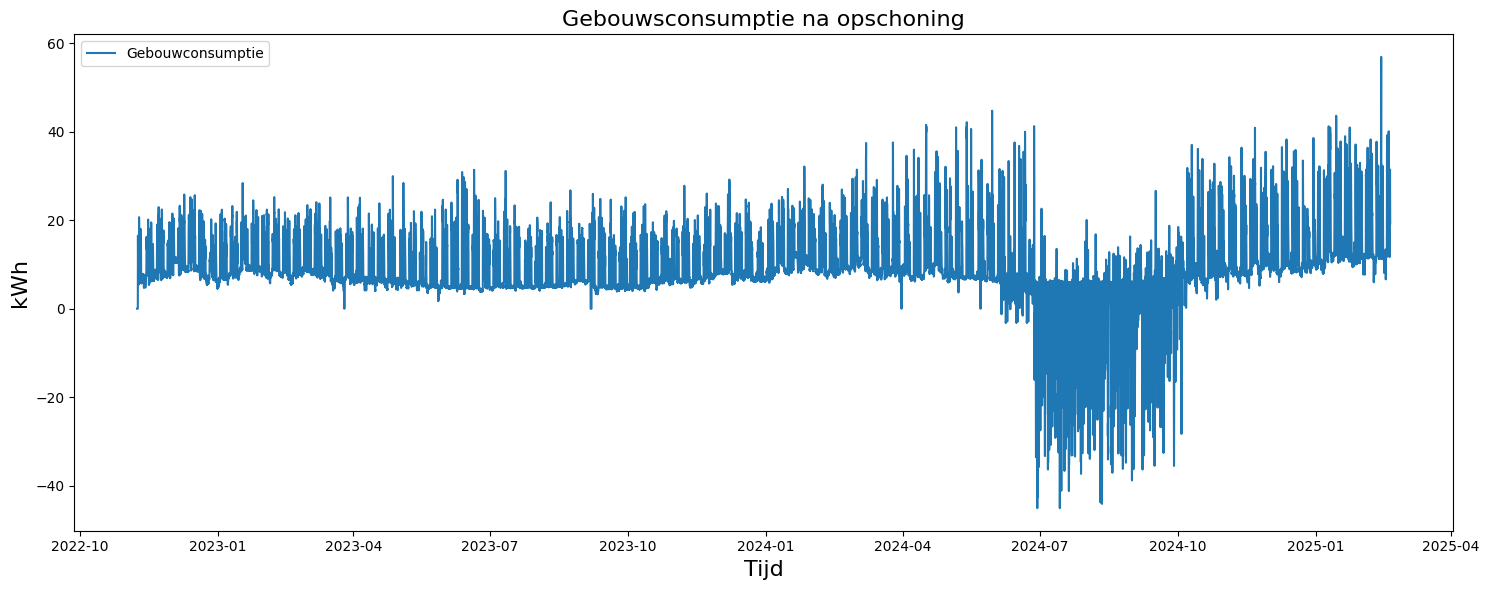

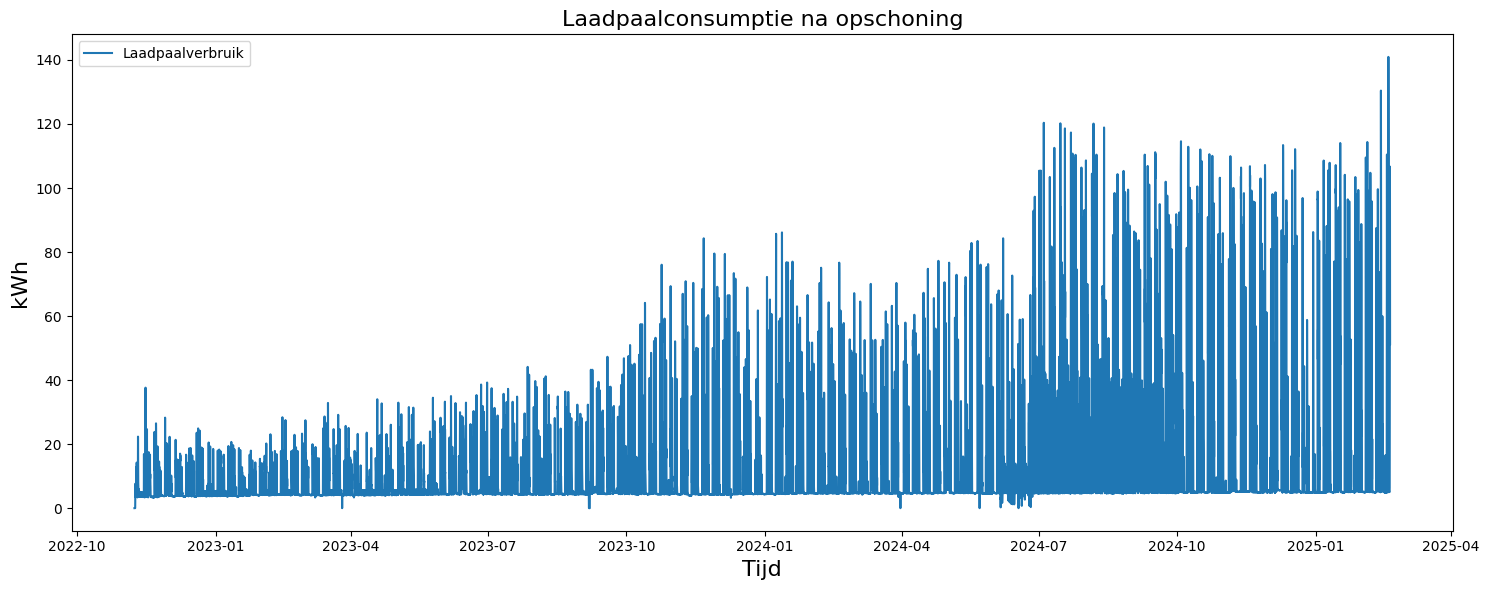

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load Data ---
input_file = './api_data/aggregated_hourly_measurements.csv'
df = pd.read_csv(input_file, sep=',', decimal='.', quotechar='"')

# --- Format datetime ---
df['Hour'] = pd.to_datetime(df['Hour'])
df.set_index('Hour', inplace=True)

# --- Reindex to complete hourly timeline (do this EARLY) ---
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)

# --- Correct 'Chargers achteraan' before cutoff ---
cutoff = pd.Timestamp('2024-10-04')
df['Chargers achteraan adj'] = df['Chargers achteraan']
df.loc[df.index < cutoff, 'Chargers achteraan adj'] = df.loc[df.index < cutoff, 'Chargers achteraan'] * 6

# --- Calculate both Chargers total and Total consumption ---
df['Chargers total'] = df['Chargers'].fillna(0) + df['Chargers achteraan adj'].fillna(0)
df['Chargers total'] = df['Chargers total'].clip(lower=0)

df['Chargers'] = (
    df['Grid Organi lbc'].fillna(0) +
    df['Solar'].where(df.index >= '2024-06-27', 0).fillna(0) -
    df['Chargers'].fillna(0) -
    df['Chargers achteraan adj'].fillna(0)
)

# --- Add helper columns for grouping ---
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour

# --- Period 1: Verwijderen ---
period1 = pd.date_range('2022-09-28', '2022-11-08', freq='H')
df.loc[df.index.isin(period1), ['Chargers', 'Chargers total']] = np.nan

# --- Period 2: Interpoleren met gemiddelden uit 2023 ---
period2 = pd.date_range('2023-08-24', '2023-09-06', freq='H')
df.loc[df.index.isin(period2), ['Chargers', 'Chargers total']] = np.nan

df_2023 = df[(df.index.year == 2023) & df['Chargers'].notna()]
avg_total = df_2023.groupby(['day_of_week', 'hour_of_day'])['Chargers'].mean()
avg_chargers = df_2023.groupby(['day_of_week', 'hour_of_day'])['Chargers total'].mean()

for dt in period2:
    dow, hour = dt.dayofweek, dt.hour
    if pd.isna(df.loc[dt, 'Chargers']) and (dow, hour) in avg_total.index:
        df.loc[dt, 'Chargers'] = avg_total.loc[(dow, hour)]
    if pd.isna(df.loc[dt, 'Chargers total']) and (dow, hour) in avg_chargers.index:
        df.loc[dt, 'Chargers total'] = avg_chargers.loc[(dow, hour)]

# --- Corrigeer foutieve laaddata juni 2024 ---
wrong_dates = pd.to_datetime([
    '2024-06-08', '2024-06-09', '2024-06-15',
    '2024-06-16', '2024-06-22', '2024-06-23'
])
for d in wrong_dates:
    mask = df.index.normalize() == d.normalize()
    df.loc[mask, ['Chargers', 'Chargers total']] = np.nan

df_2024 = df[(df.index.year == 2024) & df['Chargers'].notna()]
avg_total_2024 = df_2024.groupby(['day_of_week', 'hour_of_day'])['Chargers'].mean()
avg_chargers_2024 = df_2024.groupby(['day_of_week', 'hour_of_day'])['Chargers total'].mean()

for d in wrong_dates:
    mask = df.index.normalize() == d.normalize()
    for dt in df[mask].index:
        dow, hour = dt.dayofweek, dt.hour
        if pd.isna(df.loc[dt, 'Chargers']) and (dow, hour) in avg_total_2024.index:
            df.loc[dt, 'Chargers'] = avg_total_2024.loc[(dow, hour)]
        if pd.isna(df.loc[dt, 'Chargers total']) and (dow, hour) in avg_chargers_2024.index:
            df.loc[dt, 'Chargers total'] = avg_chargers_2024.loc[(dow, hour)]

# --- Clean up ---
df.drop(columns=['day_of_week', 'hour_of_day'], inplace=True)

# --- Prepare for output ---
df.reset_index(inplace=True)
df.rename(columns={'index': 'Hour'}, inplace=True)
df.sort_values(by='Hour', inplace=True)

# --- Result export (optioneel) ---
df_result = df[['Hour', 'Chargers total']]
df_result.to_csv('cleaned_consumption.csv', index=False)

# --- Plot gebouwverbruik ---
df.set_index('Hour', inplace=True)
plt.figure(figsize=(15, 6))
plt.plot(df["Chargers"], label="Gebouwconsumptie")
plt.title("Gebouwsconsumptie na opschoning", fontsize=16)
plt.xlabel("Tijd", fontsize=16)
plt.ylabel("kWh", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

# --- Plot laadverbruik ---
plt.figure(figsize=(15, 6))
plt.plot(df["Chargers total"], label="Laadpaalverbruik")
plt.title("Laadpaalconsumptie na opschoning", fontsize=16)
plt.xlabel("Tijd", fontsize=16)
plt.ylabel("kWh", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()


Eerste 5 rijen:
                     Total_consumption
Hour                                  
2022-11-09 00:00:00            33.9720
2022-11-09 01:00:00            33.6624
2022-11-09 02:00:00            32.8932
2022-11-09 03:00:00            32.9868
2022-11-09 04:00:00            34.4490

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20005 entries, 2022-11-09 00:00:00 to 2025-02-19 12:00:00
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_consumption  19979 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB

Basisstatistieken:
       Total_consumption
count       19979.000000
mean           65.057867
std            39.392794
min           -15.128400
25%            38.564400
50%            51.326400
75%            82.638300
max           341.310000

Aantal ontbrekende waarden per kolom:
Total_consumption    26
dtype: int64

Aantal duplicaten: 1069
Frequentie ingesteld op 

C:\Users\user\AppData\Local\Temp\ipykernel_26444\1472038494.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')


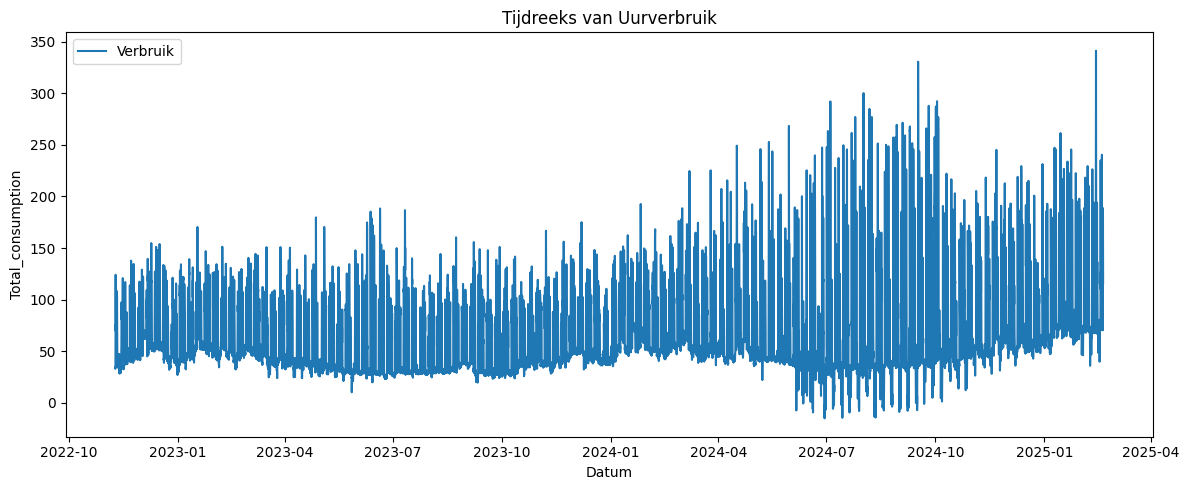

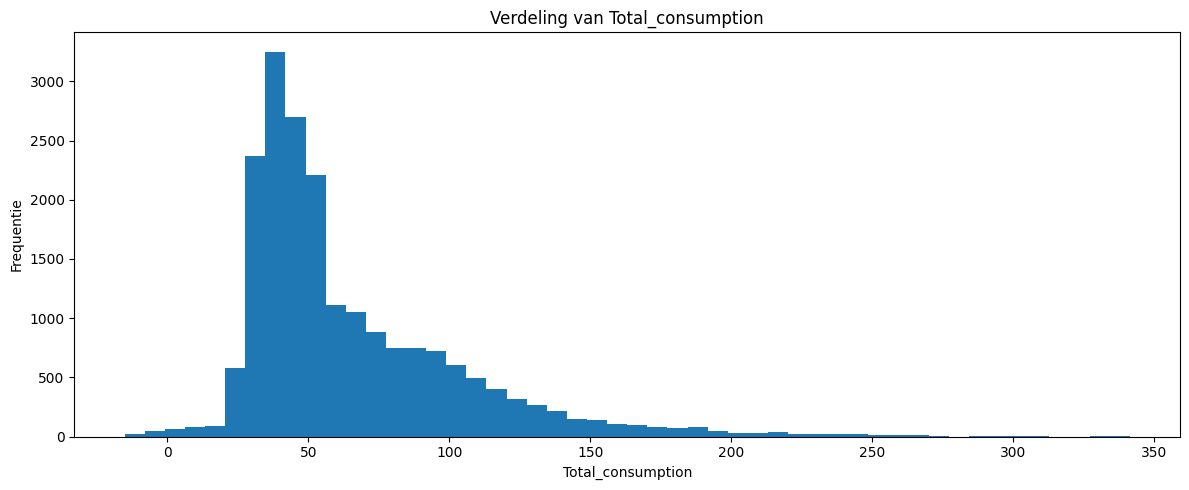

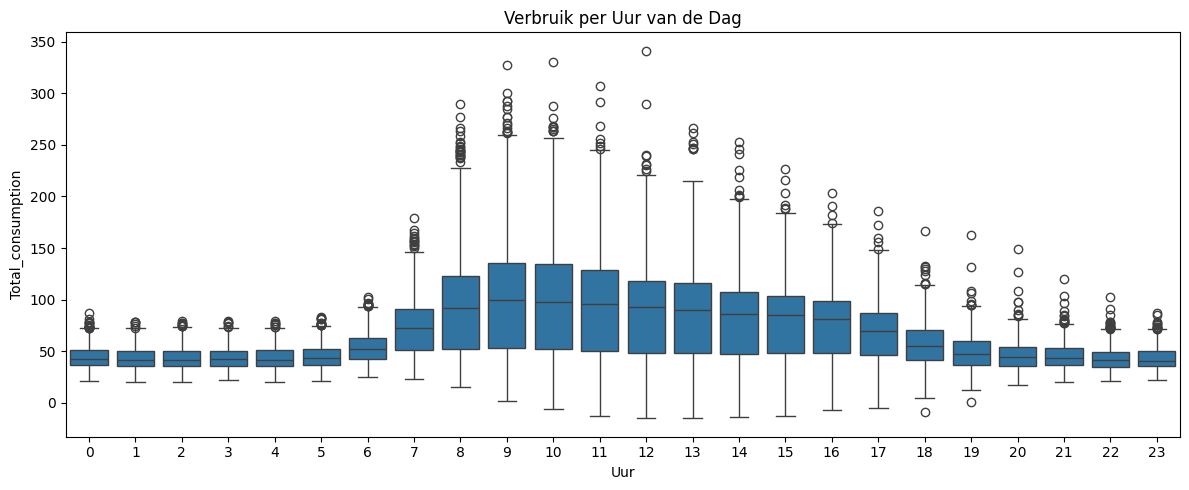

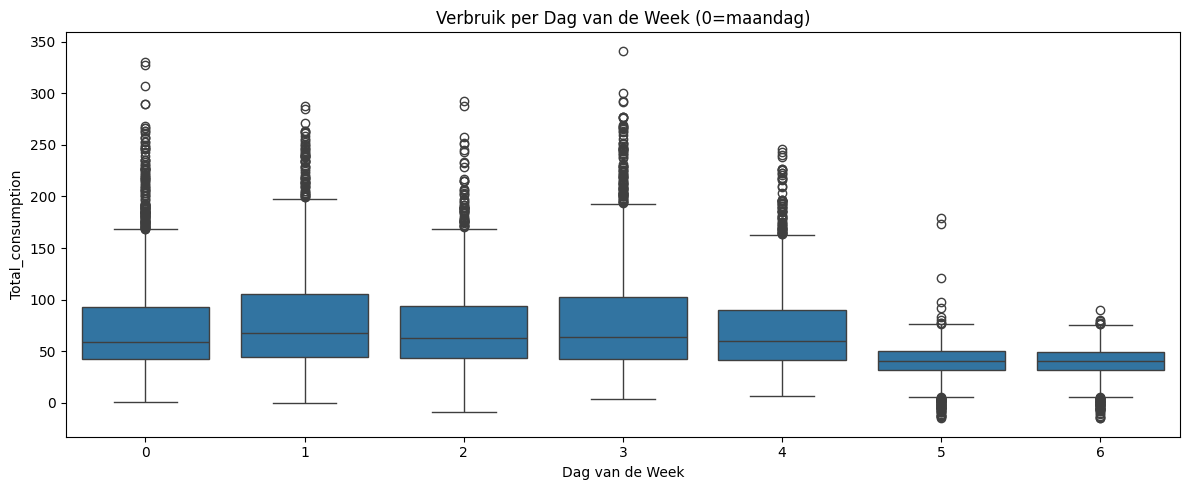

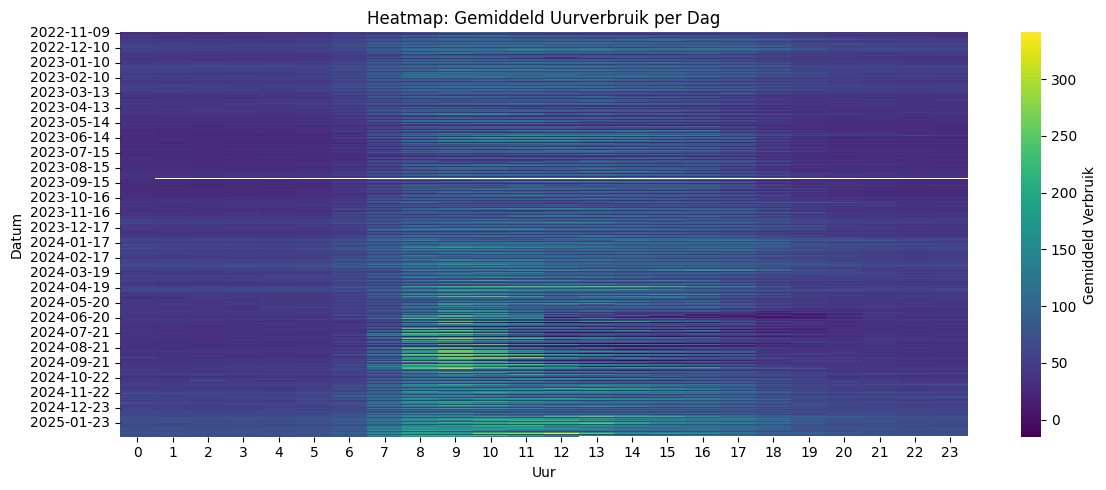

<Figure size 1200x500 with 0 Axes>

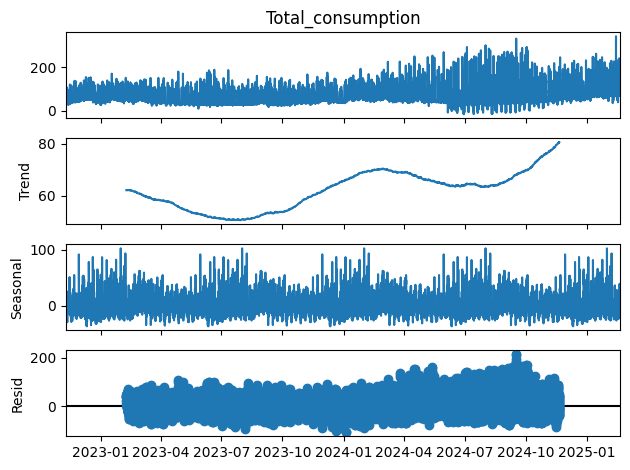

<Figure size 1200x500 with 0 Axes>

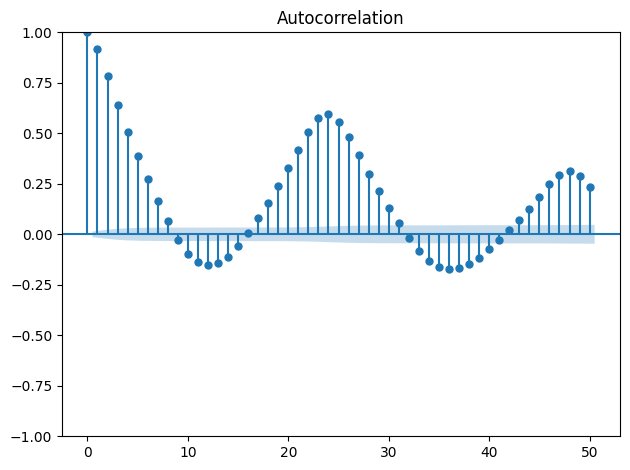

<Figure size 1200x500 with 0 Axes>

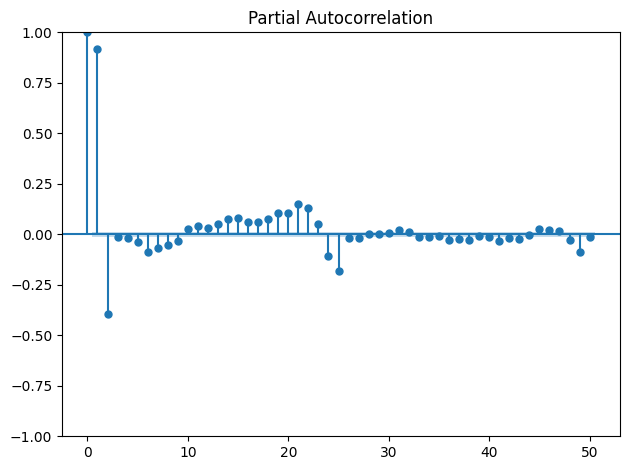

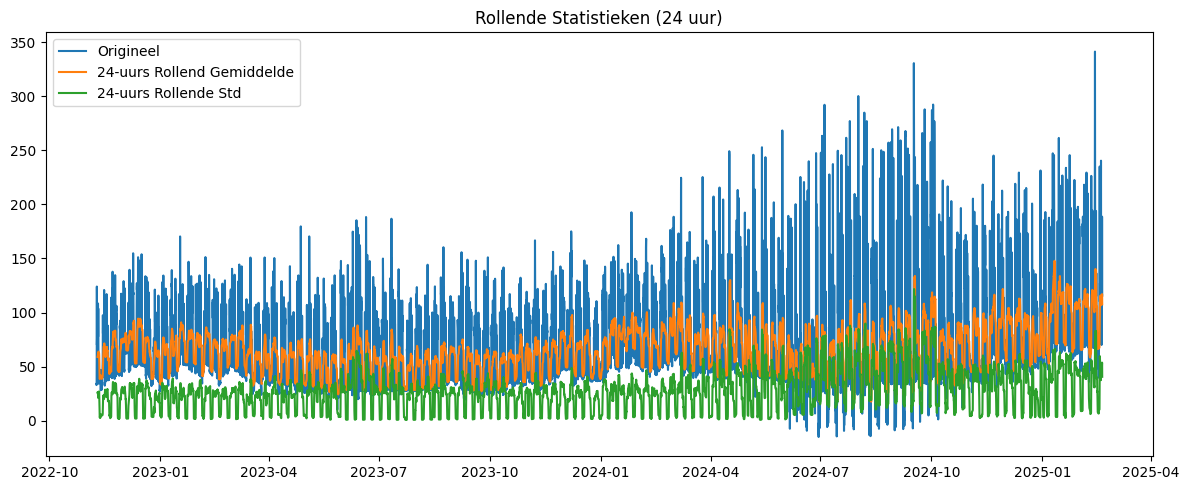

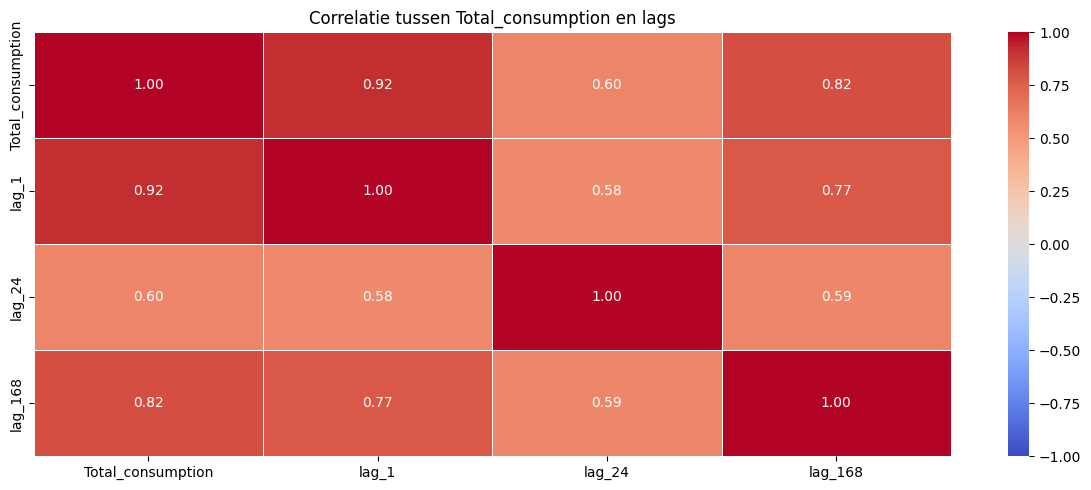

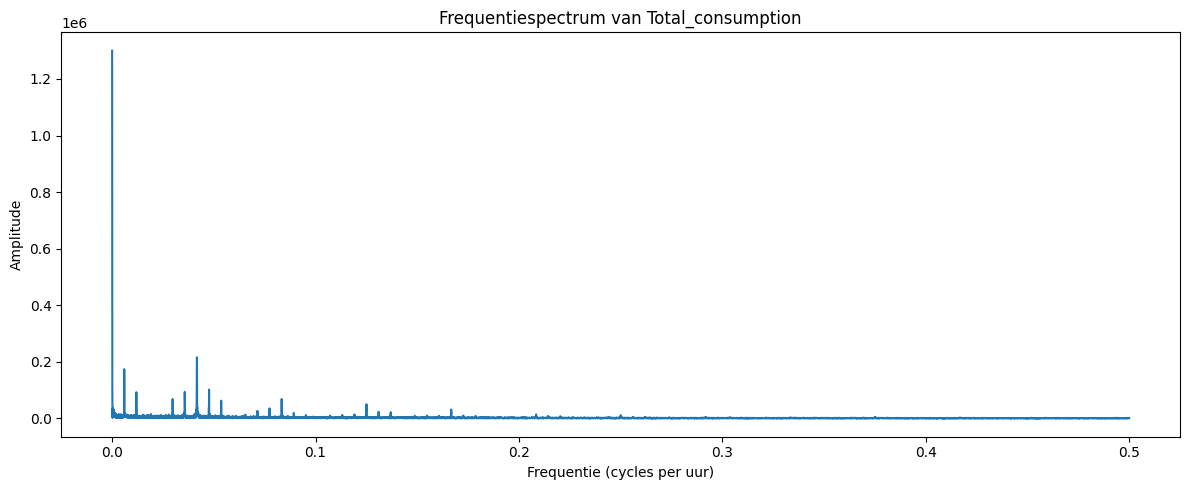

EDA voltooid!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

# Zorg voor compatibiliteit met datetime-plotten
register_matplotlib_converters()

# 1. Data inladen
# ----------------
file_path = './api_data/hourly_building_consumption.csv'

df = pd.read_csv(file_path, parse_dates=['Hour'], index_col='Hour')

# 2. Eerste inspectie
# -------------------
print("Eerste 5 rijen:")
print(df.head())
print("\nData info:")
df.info()
print("\nBasisstatistieken:")
print(df.describe())

# 3. Controle op ontbrekende waarden en duplicaten
# --------------------------------------------------
print("\nAantal ontbrekende waarden per kolom:")
print(df.isna().sum())
print("\nAantal duplicaten:", df.duplicated().sum())

# 4. Tijdreeks-index en frequentie
# --------------------------------
# Controleer en stel de frequentie in als deze niet automatisch is afgeleid
if df.index.freq is None:
    df = df.asfreq('H')
    print("Frequentie ingesteld op uur (H)")

# 5. Visualisatie van de tijdreeks
# ---------------------------------
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Chargers'], label='Verbruik')
plt.title('Tijdreeks van Uurverbruik')
plt.xlabel('Datum')
plt.ylabel('Chargers')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Histogram en verdeling
# ---------------------------
plt.figure(figsize=(12, 5))
plt.hist(df['Chargers'].dropna(), bins=50)
plt.title('Verdeling van Chargers')
plt.xlabel('Chargers')
plt.ylabel('Frequentie')
plt.tight_layout()
plt.show()

# 7. Boxplots per uur en per dag van de week
# --------------------------------------------
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

plt.figure(figsize=(12, 5))
sns.boxplot(x='hour', y='Chargers', data=df)
plt.title('Verbruik per Uur van de Dag')
plt.xlabel('Uur')
plt.ylabel('Chargers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='dayofweek', y='Chargers', data=df)
plt.title('Verbruik per Dag van de Week (0=maandag)')
plt.xlabel('Dag van de Week')
plt.ylabel('Chargers')
plt.tight_layout()
plt.show()

# 8. Heatmap van gemiddelde verbruik per dag-uur
# ----------------------------------------------
pivot = df.pivot_table(values='Chargers', index=df.index.date, columns='hour', aggfunc='mean')
plt.figure(figsize=(12, 5))
sns.heatmap(pivot, cmap='viridis', cbar_kws={'label': 'Gemiddeld Verbruik'})
plt.title('Heatmap: Gemiddeld Uurverbruik per Dag')
plt.xlabel('Uur')
plt.ylabel('Datum')
plt.tight_layout()
plt.show()

# 9. Seizoensdecompositie
# ------------------------
# Kies model='additive' of 'multiplicative' afhankelijk van aard data
decomp = seasonal_decompose(df['Chargers'].dropna(), model='additive', period=24*365//2)  # jaar- en halfjaarlijks patroon
plt.figure(figsize=(12, 5))
decomp.plot()
plt.tight_layout()
plt.show()

# 10. Autocorrelatie en partiële autocorrelatie
# ----------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df['Chargers'].dropna(), lags=50)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Chargers'].dropna(), lags=50)
plt.tight_layout()
plt.show()

# 11. Rollende statistieken
# -------------------------
plt.figure(figsize=(12, 5))
rolling_mean = df['Chargers'].rolling(window=24).mean()
rolling_std = df['Chargers'].rolling(window=24).std()
plt.plot(df['Chargers'], label='Origineel')
plt.plot(rolling_mean, label='24-uurs Rollend Gemiddelde')
plt.plot(rolling_std, label='24-uurs Rollende Std')
plt.legend()
plt.title('Rollende Statistieken (24 uur)')
plt.tight_layout()
plt.show()

# 12. Lag-features en correlatie­plot
# -----------------------------------
import seaborn as sns      # stond al eerder in het script
import matplotlib.pyplot as plt

lags = [1, 24, 168]        # vorige uur, vorige dag, vorige week
for lag in lags:
    df[f'lag_{lag}'] = df['Chargers'].shift(lag)

corr = df[['Chargers'] + [f'lag_{lag}' for lag in lags]].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(
    corr,
    annot=True,            # toon de waarden in de vakjes
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    fmt=".2f"
)
plt.title('Correlatie tussen Chargers en lags')
plt.tight_layout()
plt.show()

# 13. Fourier-transformatie van de tijdreeks
# -------------------------------------------
fft_vals = np.fft.fft(df['Chargers'].dropna())
fft_freq = np.fft.fftfreq(len(fft_vals), d=1)  # d=1 uur

plt.figure(figsize=(12, 5))
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_vals)[:len(fft_vals)//2])
plt.title('Frequentiespectrum van Chargers')
plt.xlabel('Frequentie (cycles per uur)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Einde script
print('EDA voltooid!')


Eerste 5 rijen:
                     Chargers
Hour                         
2022-09-28 12:00:00       NaN
2022-09-28 13:00:00       NaN
2022-09-28 14:00:00       NaN
2022-09-28 15:00:00       NaN
2022-09-28 16:00:00       NaN

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21001 entries, 2022-09-28 12:00:00 to 2025-02-19 12:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chargers  20028 non-null  float64
dtypes: float64(1)
memory usage: 328.1 KB

Basisstatistieken:
           Chargers
count  20028.000000
mean      12.251328
std       17.192612
min        0.000000
25%        4.449775
50%        4.946900
75%       10.868725
max      140.956500

Aantal ontbrekende waarden per kolom:
Chargers    973
dtype: int64

Aantal duplicaten: 4888
Frequentie ingesteld op uur (H)


C:\Users\user\AppData\Local\Temp\ipykernel_15332\2400990082.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')


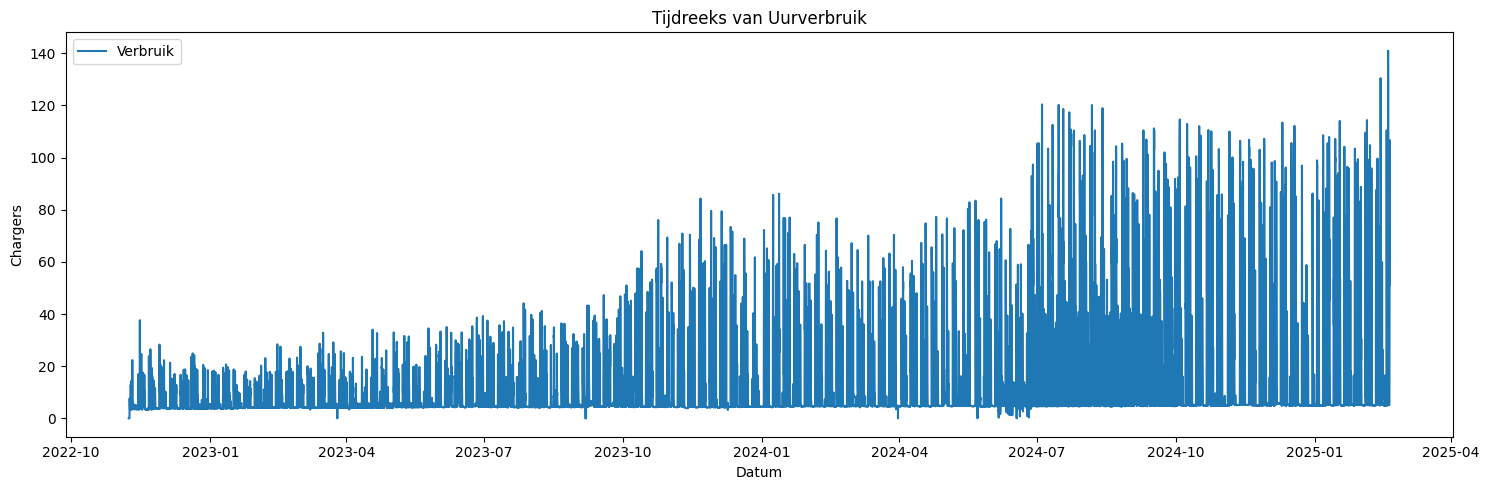

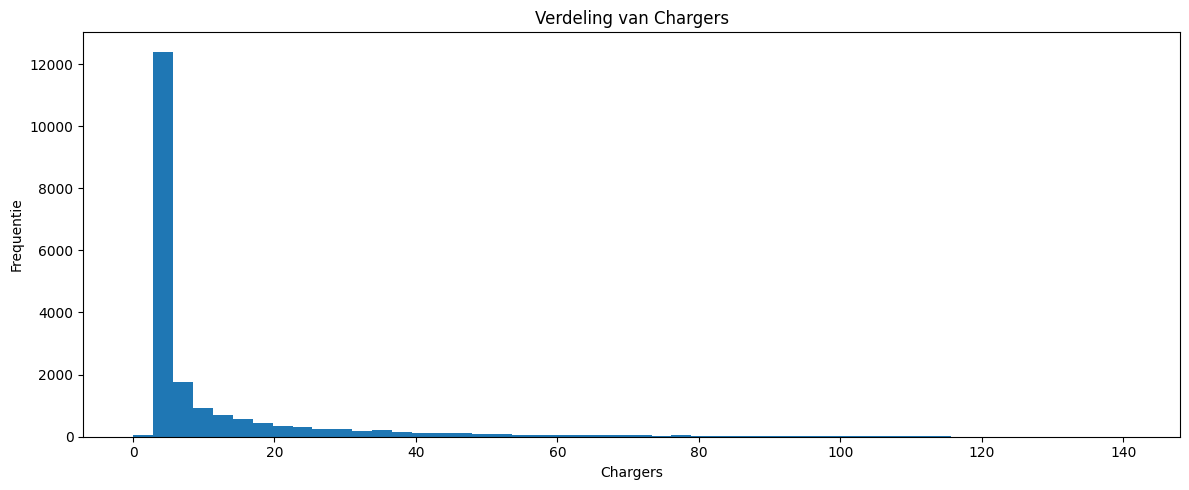

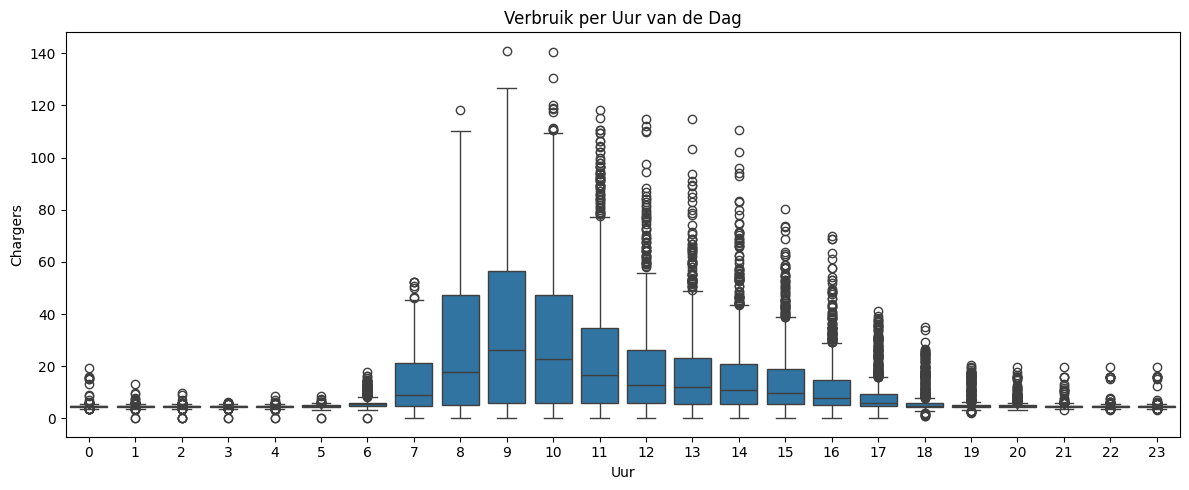

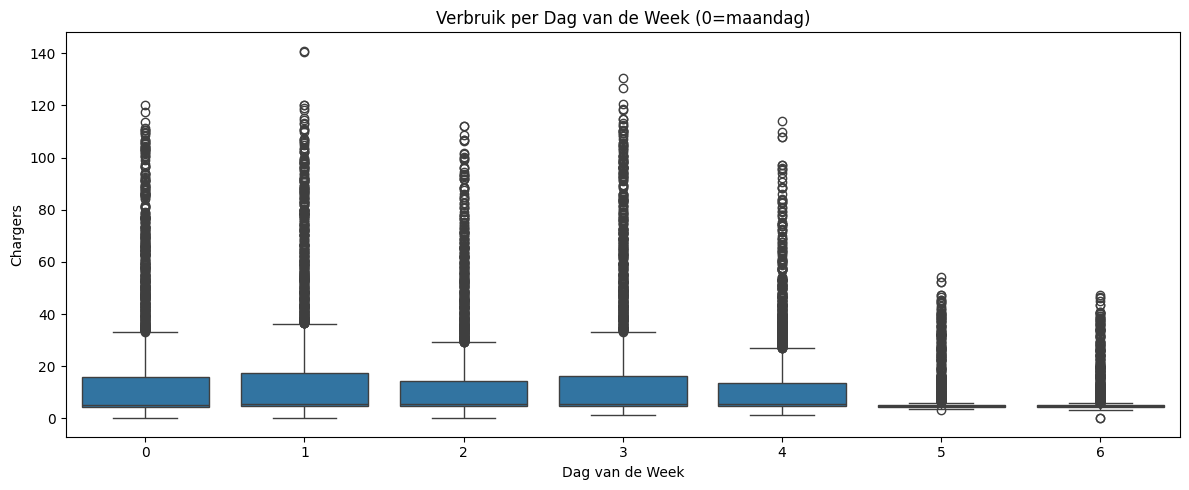

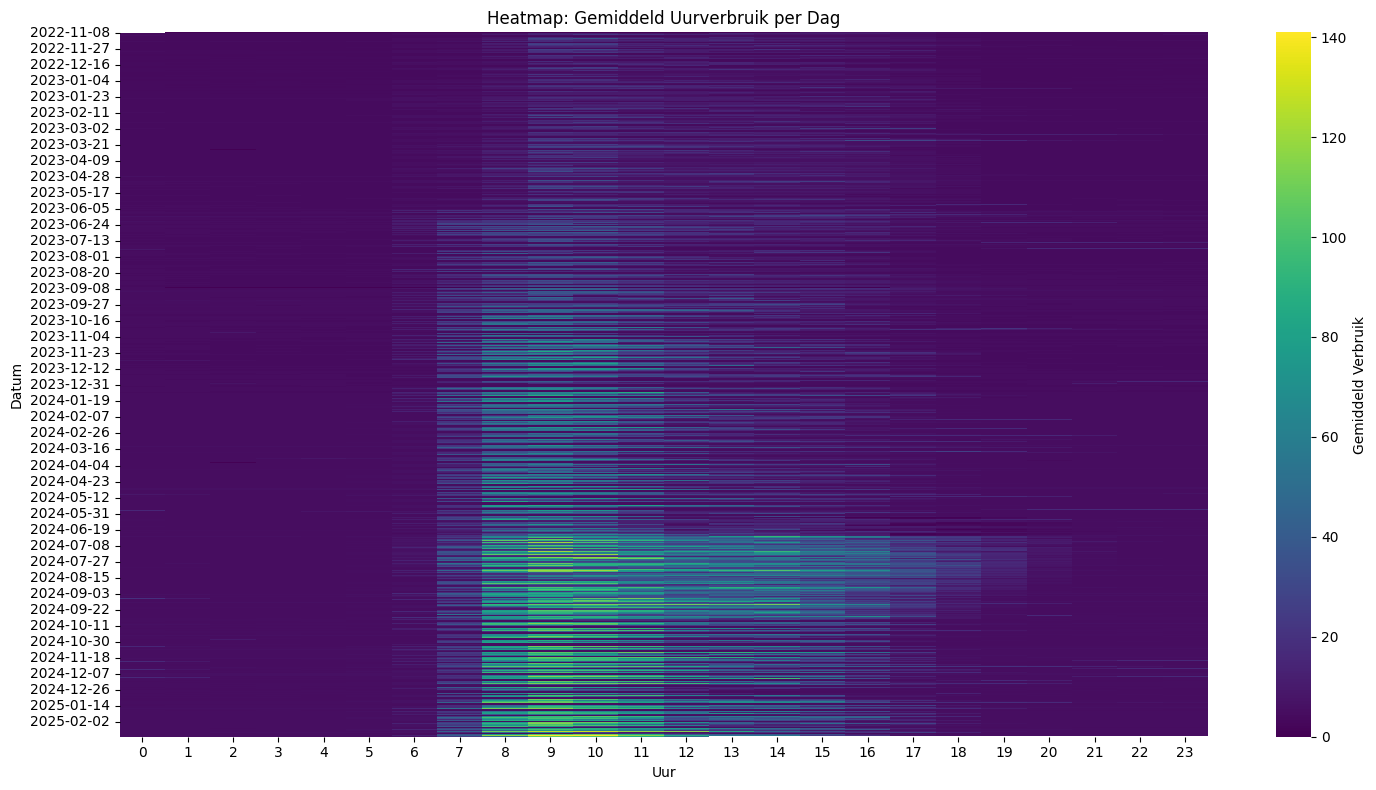

<Figure size 1200x900 with 0 Axes>

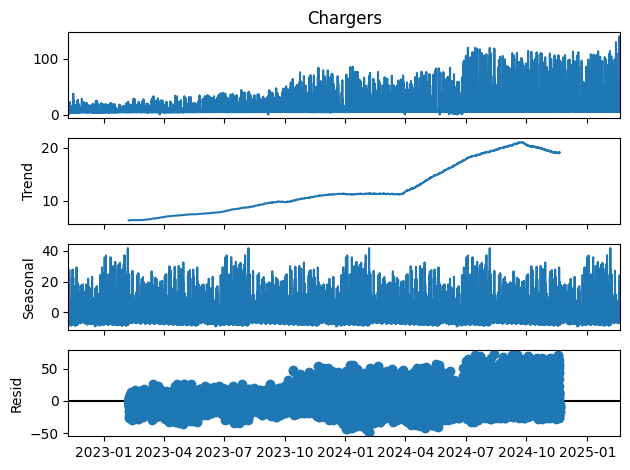

<Figure size 1200x500 with 0 Axes>

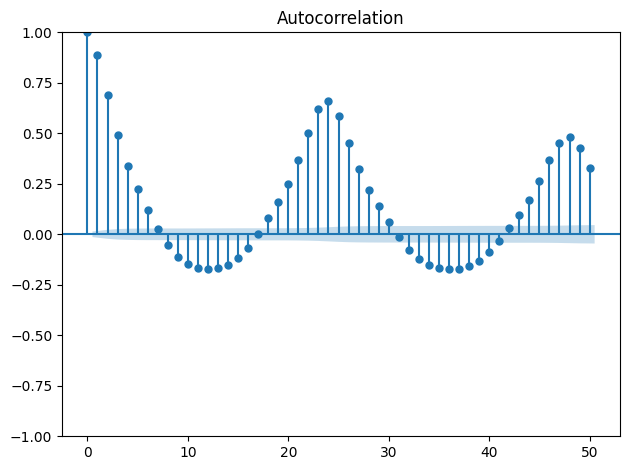

<Figure size 1200x500 with 0 Axes>

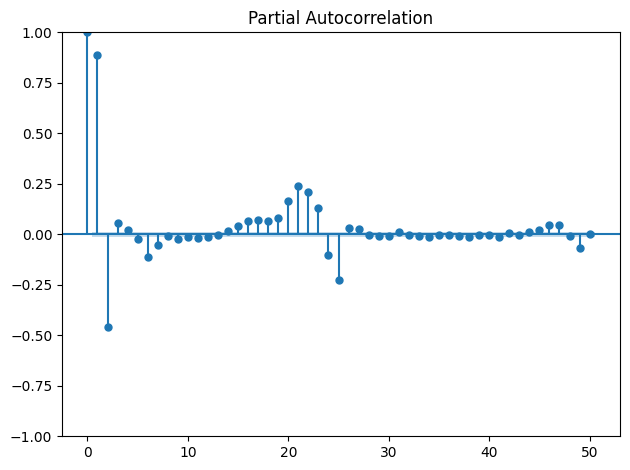

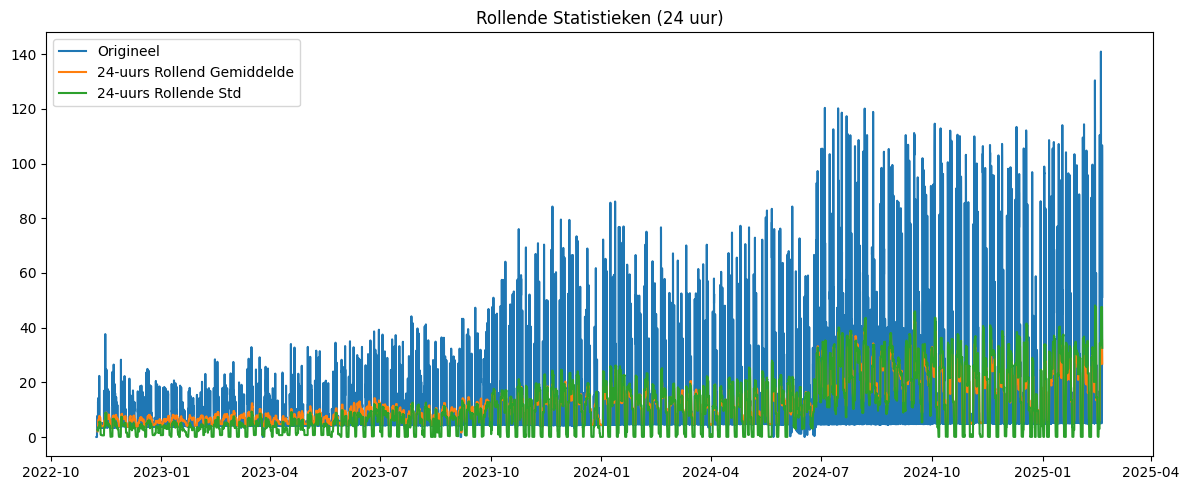


Augmented Dickey-Fuller Test
ADF-statistiek : -11.94698129714495
p-waarde : 4.406760562618833e-22
# lags gebruikt : 46
# observaties : 19981
=> H0 verwerpen: de serie is stationair

KPSS Test (level stationarity)
KPSS-statistiek : 19.934298241951126
p-waarde : 0.01
# lags gebruikt : 46
=> H0 verwerpen: de serie is NIET stationair


C:\Users\user\AppData\Local\Temp\ipykernel_15332\2400990082.py:145: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags='auto')


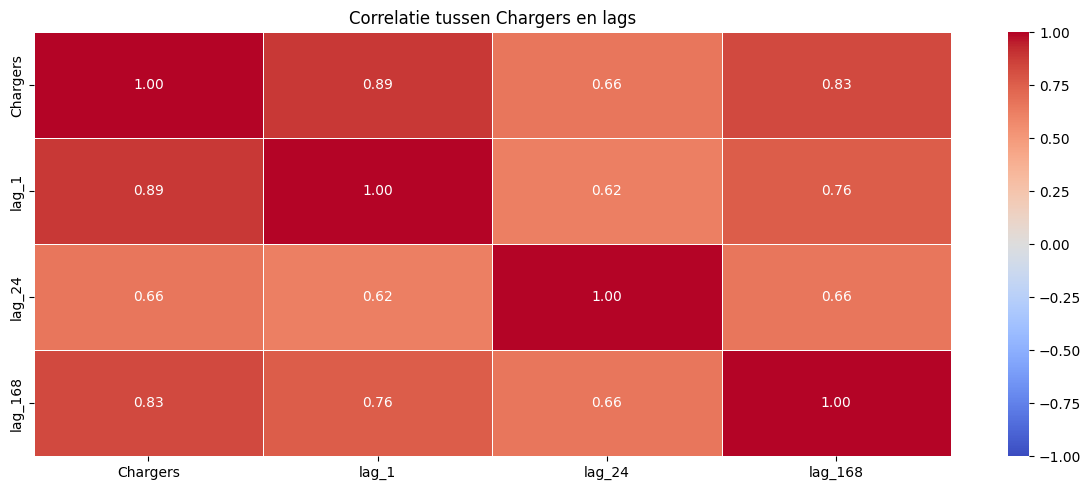

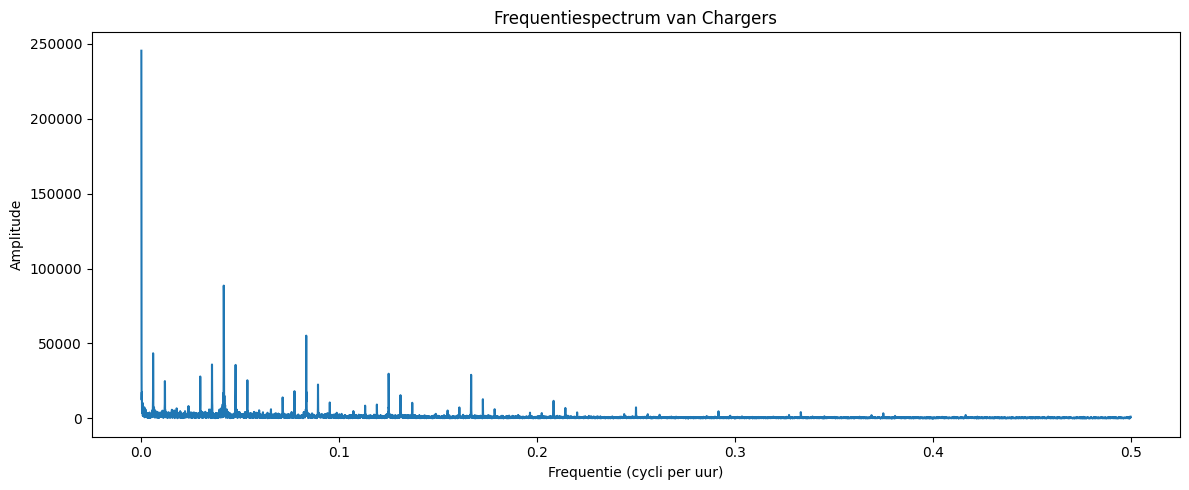

EDA voltooid!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

# Zorg voor compatibiliteit met datetime-plotten
register_matplotlib_converters()

# 1. Data inladen
# ----------------
file_path = './cleaned_consumption.csv'

df = pd.read_csv(file_path, parse_dates=['Hour'], index_col='Hour')

# 2. Eerste inspectie
# -------------------
print("Eerste 5 rijen:")
print(df.head())
print("\nData info:")
df.info()
print("\nBasisstatistieken:")
print(df.describe())

# 3. Controle op ontbrekende waarden en duplicaten
# --------------------------------------------------
print("\nAantal ontbrekende waarden per kolom:")
print(df.isna().sum())
print("\nAantal duplicaten:", df.duplicated().sum())

# 4. Tijdreeks-index en frequentie
# --------------------------------
# Controleer en stel de frequentie in als deze niet automatisch is afgeleid
if df.index.freq is None:
    df = df.asfreq('H')
    print("Frequentie ingesteld op uur (H)")

# 5. Visualisatie van de tijdreeks
# ---------------------------------
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Chargers'], label='Verbruik')
plt.title('Tijdreeks van Uurverbruik')
plt.xlabel('Datum')
plt.ylabel('Chargers')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Histogram en verdeling
# ---------------------------
plt.figure(figsize=(12, 5))
plt.hist(df['Chargers'].dropna(), bins=50)
plt.title('Verdeling van Chargers')
plt.xlabel('Chargers')
plt.ylabel('Frequentie')
plt.tight_layout()
plt.show()

# 7. Boxplots per uur en per dag van de week
# --------------------------------------------
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

plt.figure(figsize=(12, 5))
sns.boxplot(x='hour', y='Chargers', data=df)
plt.title('Verbruik per Uur van de Dag')
plt.xlabel('Uur')
plt.ylabel('Chargers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='dayofweek', y='Chargers', data=df)
plt.title('Verbruik per Dag van de Week (0=maandag)')
plt.xlabel('Dag van de Week')
plt.ylabel('Chargers')
plt.tight_layout()
plt.show()

# 8. Heatmap van gemiddelde verbruik per dag-uur
# ----------------------------------------------
pivot = df.pivot_table(values='Chargers', index=df.index.date, columns='hour', aggfunc='mean')
plt.figure(figsize=(15, 8))
sns.heatmap(pivot, cmap='viridis', cbar_kws={'label': 'Gemiddeld Verbruik'})
plt.title('Heatmap: Gemiddeld Uurverbruik per Dag')
plt.xlabel('Uur')
plt.ylabel('Datum')
plt.tight_layout()
plt.show()

# 9. Seizoensdecompositie
# ------------------------
# Kies model='additive' of 'multiplicative' afhankelijk van aard data
decomp = seasonal_decompose(df['Chargers'].dropna(), model='additive', period=24*365//2)  # jaar- en halfjaarlijks patroon
plt.figure(figsize=(12, 9))
decomp.plot()
plt.tight_layout()
plt.show()

# 10. Autocorrelatie en partiële autocorrelatie
# ----------------------------------------------
plt.figure(figsize=(12, 5))
plot_acf(df['Chargers'].dropna(), lags=50)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Chargers'].dropna(), lags=50)
plt.tight_layout()
plt.show()

# 11. Rollende statistieken
# -------------------------
plt.figure(figsize=(12, 5))
rolling_mean = df['Chargers'].rolling(window=24).mean()
rolling_std = df['Chargers'].rolling(window=24).std()
plt.plot(df['Chargers'], label='Origineel')
plt.plot(rolling_mean, label='24-uurs Rollend Gemiddelde')
plt.plot(rolling_std, label='24-uurs Rollende Std')
plt.legend()
plt.title('Rollende Statistieken (24 uur)')
plt.tight_layout()
plt.show()

# 12. Stationariteitstoetsen (ADF en KPSS)
# ---------------------------------------

def adf_test(series, title='Augmented Dickey-Fuller Test'):
    print(f"\n{title}")
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF-statistiek', 'p-waarde', '# lags gebruikt', '# observaties']
    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("=> H0 verwerpen: de serie is stationair")
    else:
        print("=> H0 niet verwerpen: de serie is NIET stationair")


def kpss_test(series, title='KPSS Test (level stationarity)'):
    print(f"\n{title}")
    result = kpss(series.dropna(), regression='c', nlags='auto')
    labels = ['KPSS-statistiek', 'p-waarde', '# lags gebruikt']
    for value, label in zip(result[:3], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("=> H0 verwerpen: de serie is NIET stationair")
    else:
        print("=> H0 niet verwerpen: de serie is stationair")

# Uitvoeren van de tests
adf_test(df['Chargers'])
kpss_test(df['Chargers'])

# 13. Correlaties met lags
# ------------------------
lags = [1, 24, 168]  # vorige uur, vorige dag, vorige week
for lag in lags:
    df[f'lag_{lag}'] = df['Chargers'].shift(lag)

corr = df[['Chargers'] + [f'lag_{lag}' for lag in lags]].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    fmt=".2f"
)
plt.title('Correlatie tussen Chargers en lags')
plt.tight_layout()
plt.show()

# 14. Fourier-transformatie van de tijdreeks
# -------------------------------------------
fft_vals = np.fft.fft(df['Chargers'].dropna())
fft_freq = np.fft.fftfreq(len(fft_vals), d=1)  # d=1 uur

plt.figure(figsize=(12, 5))
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_vals)[:len(fft_vals)//2])
plt.title('Frequentiespectrum van Chargers')
plt.xlabel('Frequentie (cycli per uur)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Einde script
print('EDA voltooid!')


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

"""
Kernscript: stationariteit controleren en verbeteren
---------------------------------------------------
1. Laad de reeks (kolom **Chargers**) uit cleaned_consumption.csv
2. Voer ADF & KPSS uit op:
   • originele reeks
   • eerste verschil (d = 1)
   • combinatie van eerste + seizoensverschil (D = 1, seizoen = 24 uur)
3. Print samenvatting zodat je snel ziet welke transformatie stationair is.
"""

# ---------- 1. Data inladen ----------
file_path = "./cleaned_consumption.csv"
df = pd.read_csv(file_path, parse_dates=["Hour"], index_col="Hour")

# Zorg voor consistente uurbasis
if df.index.freq is None:
    df = df.asfreq("H")

series = df["Chargers"].astype(float)

# ---------- 2. Hulpfuncties ----------

def adf_test(x, title="ADF"):
    res = adfuller(x, autolag="AIC")
    print(f"\n{title}: ADF = {res[0]:.4f},  p = {res[1]:.4g},  lags = {res[2]},  N = {res[3]}")
    print("  => Stationair" if res[1] <= 0.05 else "  => NIET stationair")


def kpss_test(x, title="KPSS", regression="c"):
    stat, p, lags, _ = kpss(x, regression=regression, nlags="auto")
    print(f"{title}: KPSS = {stat:.4f}, p = {p:.4g}, lags = {lags}")
    if p <= 0.05:
        print("  => NIET stationair")
    else:
        print("  => Stationair")

# ---------- 3. Tests op originele reeks ----------
print("=== Originele reeks ===")
adf_test(series, "ADF origineel")
kpss_test(series, "KPSS origineel (level)")
kpss_test(series, "KPSS origineel (trend)", regression="ct")

# ---------- 4. Eerste verschil ----------
series_d1 = series.diff().dropna()
print("\n=== Eerste verschil (d=1) ===")
adf_test(series_d1, "ADF diff1")
kpss_test(series_d1, "KPSS diff1 (level)")
kpss_test(series_d1, "KPSS diff1 (trend)", regression="ct")

# ---------- 5. Eerste + seizoensverschil ----------
season_lag = 24  # 24 uur = 1 dag
series_d1D1 = series.diff().diff(season_lag).dropna()
print(f"\n=== Diff1 + seizoensdiff (D=1, s={season_lag}) ===")
adf_test(series_d1D1, "ADF diff1+seasonal")
kpss_test(series_d1D1, "KPSS diff1+seasonal (level)")
kpss_test(series_d1D1, "KPSS diff1+seasonal (trend)", regression="ct")

print("\nStationariteitscontroles voltooid!")


C:\Users\user\AppData\Local\Temp\ipykernel_15332\3101154597.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq("H")


=== Originele reeks ===


MissingDataError: exog contains inf or nans